# K-최근접 이웃

이 노트북은 안드레아스 뮐러(저)의 Introduction to Machince Leaning with Python을 기반으로 작성 되었다.

In [ ]:
%matplotlib inline
import mglearn
import matplotlib.pyplot as plt

Knn 알고리즘은 가장 간단한 머신러닝 알고리즘이다. 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부이다. 새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트 즉 최근접 이웃을 찾는다.

In [15]:
#데이터셋 생성
x,y =mglearn.datasets.make_forge()

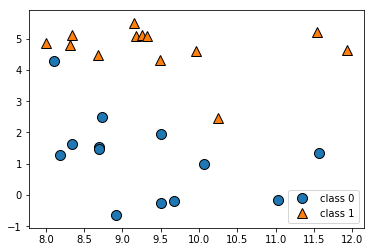

In [21]:
#산점도 그리기
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.legend(["class 0","class 1"],loc=4)

# K-최근접 이웃 분류

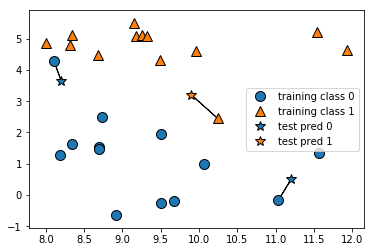

In [22]:
#1-최근접 분류
mglearn.plots.plot_knn_classification(n_neighbors=1)

Knn은 가장 가까운 이웃 하나가 아니라 임의의  k개를 선택할 수 있다. 둘 이상의 이웃을 선택할 때는 레이블을 정하기 위해 투표를한다.
즉 테스트 포인트 하나에 대해 클래스 0에 속한 이웃이 몇개인지, 그리고 클래스 1에 속한 이웃이 몇개인지를 센다.

즉 k-최근접 이웃 중 다수의 클래스가 레이블이된다.

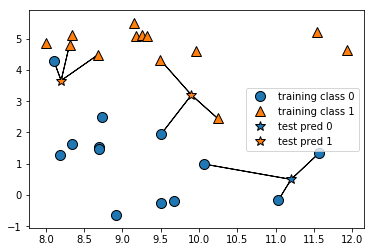

In [23]:
#3-최근접 분류
mglearn.plots.plot_knn_classification(n_neighbors=3)

여기서 test pred0의 레이블은 training class 0가 되고 test pred1의 레이블은 training class 1이 된다.

## Knn 알고리즘 적용하기

In [24]:
from sklearn.model_selection import train_test_split
x,y = mglearn.datasets.make_forge()
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [26]:
#Knn classifier import
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [27]:
#학습
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [28]:
#예측하기
print("테스트 세트 예측:{}".format(clf.predict(x_test)))

테스트 세트 예측:[1 0 1 0 1 0 0]


In [29]:
print("테스트 세트 정확도:{:.2f}".format(clf.score(x_test,y_test)))

테스트 세트 정확도:0.86


모델 정확도 86%가 나옴

# KNeighborsClassifier 분석

2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 xy평면에 그려볼 수 있다.
그리고 각 데이터 포인터가 속한 클래스에 따라 평면 색을 칠할 수 있다. 이렇게 하면 알고리즘이 클래스0과 클래스1로 지정한 영역으로 결정경계(decision boundary)를 볼 수 있다.

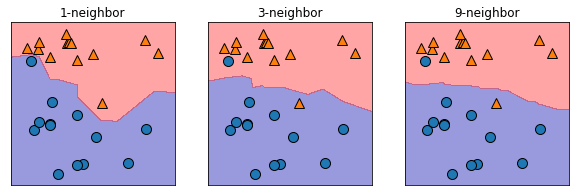

In [39]:
fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors ,ax in zip([1,3,9],axes):
    clf =KNeighborsClassifier(n_neighbors=n_neighbors).fit(x,y)
    mglearn.plots.plot_2d_separator(clf,x,fill=True,eps=0.5,ax=ax,
                                   alpha=.4)
    mglearn.discrete_scatter(x[:,0],x[:,1],y,ax=ax)
    ax.set_title("{}-neighbor".format(n_neighbors))

위의 그림과 같이 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있다. 이웃의 수를 늘릴수록 결정경계는 부드러워진다. 부드러운 경계는 더 단순한 모들을 의미한다. 

즉 이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 복잡도는 낮아진다. 훈련 데이터 전체를 이웃의 수로 지정하면 모든 테스트 포인트가 같은 이웃을 가지게 되므로 테슽 포인트에 대한 예측은 모두 같은 값이된다.

모델의 복잡도가 증가할 수록 과적합(Overfitting)이 발생하고 낮을수록 과소적합(Underfitting)이 발생한다. 
이를 살펴보기 위해 유방암 데이를 이용해 복잡도에 따른 Knn의 성능을 평가해 보겠다.

In [41]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state = 66)

Text(0.5,0,'n_neighbors')

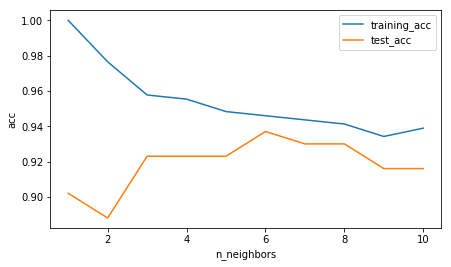

In [46]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train,y_train)
    
    training_accuracy.append(clf.score(x_train,y_train))
    test_accuracy.append(clf.score(x_test,y_test))

plt.figure(figsize=(7,4))
plt.plot(neighbors_settings,training_accuracy, label='training_acc')
plt.plot(neighbors_settings,test_accuracy, label = 'test_acc')
plt.ylabel('acc')
plt.legend()
plt.xlabel('n_neighbors')

위 그래프를 통해 이웃숫자에 따른 Overfitting과 Underfitting의 특징을 알수 있다. 최근접 이웃의 수가 하나일 때는 훈련 데이터에 대한 예측이 완벽하다. 하지만 이웃이 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 줄어든다. 

이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 보다 낮다. 이것은 1-최근접 이웃이 모델을 너무 복잡하게 만든다는 것을 설명해준다. 반대로 이웃을 10개 사용했을 때는 모델이 너무 단순해서 정확도는 더 나빠진다. 

# K-최근접 이웃 회귀

k-최근접 이웃 알고리즘은 회구분석에도 쓰인다. 

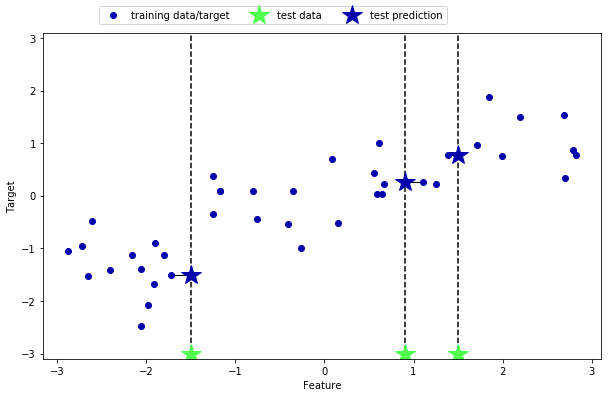

In [48]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

위 데이터는 최근접 이웃을 한 개만 이용할 때다. 예측은 그냥 가장 가까운 이웃의 타깃값이다,

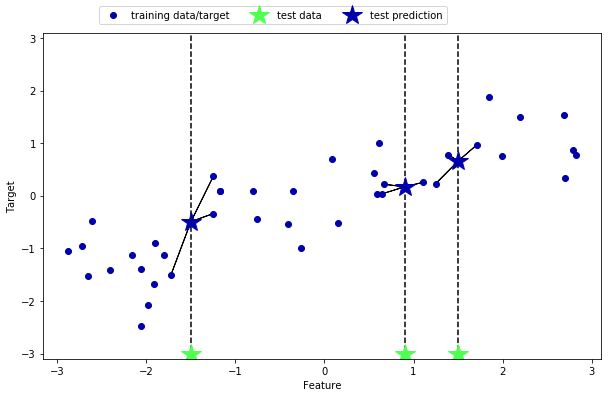

In [49]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

여기에 이웃을 둘 이상 사용하여 회귀분석을 할 수 있다. 여러 개의 최근접 이웃을 사용할 땐 이웃 간의 평균이 예측된다.

In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
x,y = mglearn.datasets.make_wave(n_samples=40)

#wave 데이터셋 훈련 세트와 테스트 세트 나눔
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=0)

#이웃의 수를 3으로 하여 모델의 객체를 만든다.
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(x_train,y_train)

print("테스트 세트 예측:\n{}".format(reg.predict(x_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


여기서도 score 메서드를 사용해 모델을 평가할 수 있다.

In [54]:
print("테스트 세트 R^2:{:.2f}".format(reg.score(x_test,y_test)))

테스트 세트 R^2:0.83


# 장단점과 매개변수

일반적으로 Knn 분류기에 중요한 매개변수는 두개이다. 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수이다.
실제로 이웃의 수는 3개나 5개 정도로 적을 때 잘 작동하지만, 이 매개변수는 잘 조정해야한다. 

Knn의 장점은 이해하기 쉬운 모델이라는 것이다. 그리고 많이 조정하지 않아도 좋은 성능을 발휘한다. 더 복잡한 알고리즘을 적용해보기 전에 시도해볼 수 있는 좋은 시작점이다. 

Knn의 단점으로는 예측이 느리고 많은 특성을 처리하는 능력이 부족해 현업에서는 잘 쓰지 않는다. 